In [98]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style('whitegrid')

### Load cleaned and merged data

In [87]:
df_cleaned = pd.read_csv('../data/clean_seattle_nyc_weather.csv') # Read the cleaned data  
df_cleaned['date'] = pd.to_datetime(df_cleaned['date']) # Convert date column to datetime format
df_cleaned.head()

,date,city,precipitation,day_of_year
0,2018-01-01,NYC,0.00,1
1,2018-01-02,NYC,0.00,2
2,2018-01-03,NYC,0.00,3
3,2018-01-04,NYC,0.49,4
4,2018-01-05,NYC,0.00,5


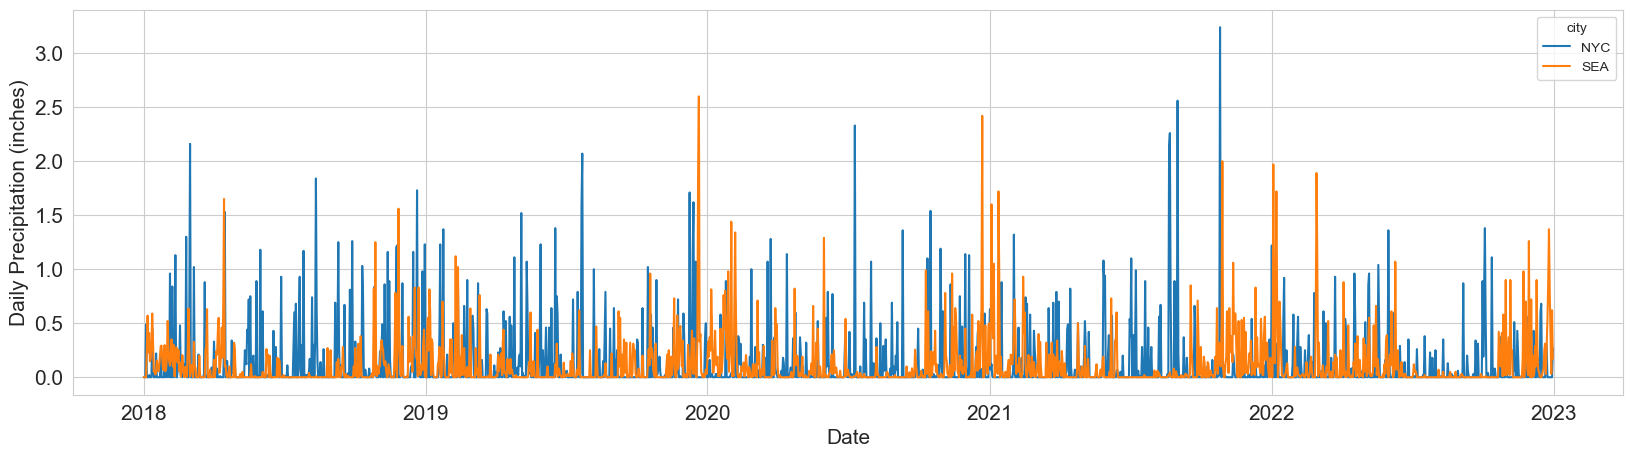

In [ ]:
# Plot the precipitation data for both cities using lineplot
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_cleaned, x='date', y='precipitation', hue ='city') 
plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily Precipitation (inches)', fontsize=15) 
plt.tick_params(labelsize=15)
plt.show()

It's difficult to understand visually which city had more rainfall over 5 years horizon. Let's try to look at rainfall for each year. 

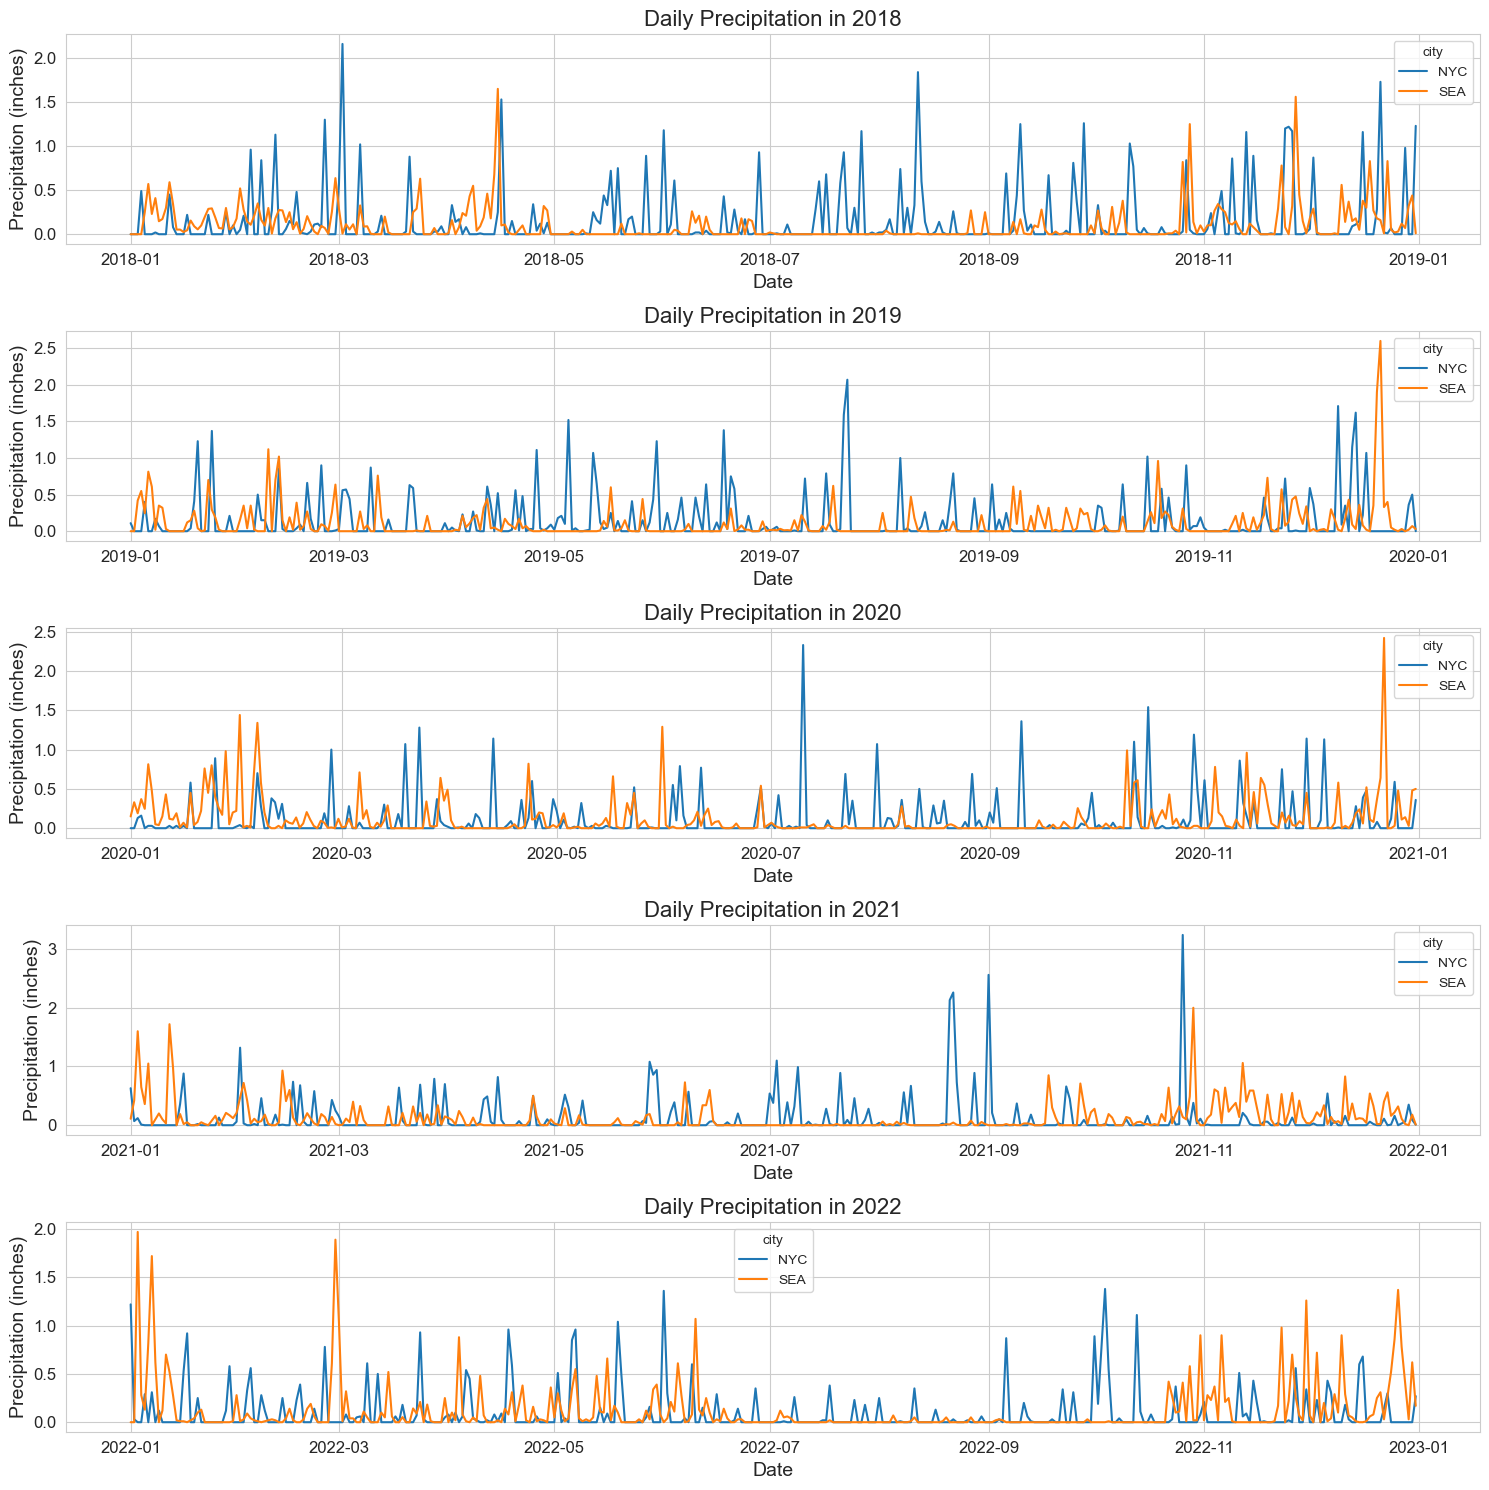

In [109]:
# First, make sure you have a 'year' column extracted from 'date'
df_cleaned['year'] = df_cleaned['date'].dt.year

# Get unique years
years = sorted(df_cleaned['year'].unique())

# Create subplots - one for each year
fig, axes = plt.subplots(len(years), 1, figsize=(15, 15), sharex=False)

# Loop through years and plot on separate axes
for i, year in enumerate(years):
    ax = axes[i]
    sns.lineplot(
        data=df_cleaned[df_cleaned['year'] == year],
        x='date', y='precipitation', hue='city', ax=ax
    )
    ax.set_title(f"Daily Precipitation in {year}", fontsize=16)
    ax.set_xlabel("Date", fontsize=14)
    ax.set_ylabel("Precipitation (inches)", fontsize=14)
    ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()


Year 2018: Visually it looks like NYC is dominating Seattle for first 9 months and last three months both the cities have same rainfall. Year 2018 NYC is winner
Year 2019: It looks like both Seattle and NYC had similar rainfall pattern. So, year 2019 is inconclusive meaning no clear winner. 
Year 2020: I see that NYC has more peaks in rainfall whereas Seattle experienced consistent rainfall pattern. However, I would say NYC had more rainfall but with lots of variation in rainfall pattern compared to Seattle. So, year 2020, I would say NYC is winner. 
Year 2021: It looks like NYC had more rainfall with lot of variation in rainfall patter. I would say NYC had more rainfall for 2021
Year 2022: Both Seattle and NYC had similar pattern of rainfall for 2022. So, no clear winner for 2022. 

Overall, I would say NYC had more rainfall with higher variation compared to Seattle based on above visual analysis. 

Let's try to find more data driven insights to make decision on which city had higher precipitations over 5-year horizon. I want to find more concrete evidence for my claim that NYC had more rainfall with higher variation compared to seattle. 

In [ ]:
# Calculate basic descriptive statistics for both cities
df_cleaned[['city','precipitation']].groupby('city').describe() 

precipitation                                               
             count     mean       std  min  25%   50%   75%   max
city                                                             
NYC         1826.0  0.12569  0.304574  0.0  0.0  0.00  0.06  3.24
SEA         1826.0  0.11327  0.240516  0.0  0.0  0.01  0.12  2.60

Based on above statistics, NYC has higher mean precipitation (0.126 inches) compared to Seattle (0.113 inches). Additionally, NYC has a higher standard deviation (0.305 inches) than Seattle (0.241 inches), indicating that NYC experiences more variability in daily precipitation levels. This falls in line with claim I made using visual insights.

In [ ]:
# Calculate the mean precipitation for both cities
df_cleaned[['city','precipitation']].groupby('city').mean() 

,precipitation
city,
NYC,0.12569
SEA,0.11327


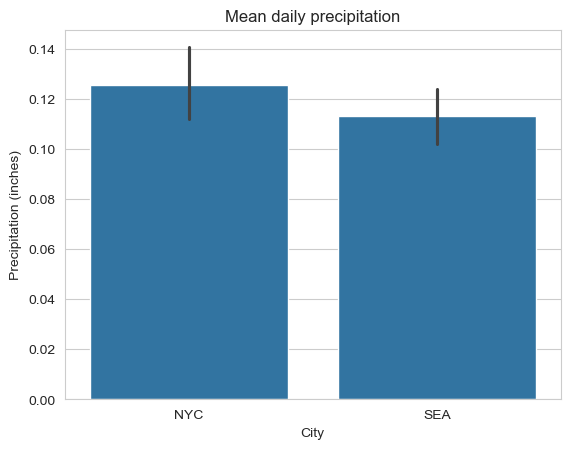

In [103]:
# Create a bar plot of mean daily precipitation for each city
#plt.figure(figsize=(20, 5))
sns.barplot(data=df_cleaned, x='city', y='precipitation')
plt.xlabel('City', fontsize=10)
plt.ylabel('Precipitation (inches)', fontsize=10) 
plt.title('Mean daily precipitation')
plt.tick_params(labelsize=10)
plt.show()

In [112]:
df_cleaned.groupby(['city', 'year'])['precipitation'].describe()

count      mean       std  min  25%     50%     75%   max
city year                                                           
NYC  2018  365.0  0.157260  0.342176  0.0  0.0  0.0000  0.1100  2.16
     2019  365.0  0.142438  0.318912  0.0  0.0  0.0000  0.0900  2.07
     2020  366.0  0.111721  0.276617  0.0  0.0  0.0000  0.0575  2.33
     2021  365.0  0.119068  0.338383  0.0  0.0  0.0000  0.0600  3.24
     2022  365.0  0.098000  0.229765  0.0  0.0  0.0000  0.0500  1.38
SEA  2018  365.0  0.102039  0.197829  0.0  0.0  0.0075  0.1400  1.65
     2019  365.0  0.105900  0.238780  0.0  0.0  0.0100  0.1200  2.60
     2020  366.0  0.118092  0.249205  0.0  0.0  0.0200  0.1100  2.42
     2021  365.0  0.121737  0.243659  0.0  0.0  0.0200  0.1400  2.00
     2022  365.0  0.118571  0.268206  0.0  0.0  0.0100  0.1000  1.97

Year 2018 & 2019: mean for NYC is higher compared to SEA which means that there was higher precipitation in NYC compared to SEA
Year 2020,2021,2022: mean for SEA is higher compared to NYC which means there was higher precipitation in SEA. 

In [113]:
# Create a new column for the month & year
df_cleaned['month'] = pd.DatetimeIndex(df_cleaned['date']).month 
df_cleaned['year'] = pd.DatetimeIndex(df_cleaned['date']).year 
df_cleaned['day_of_week'] = pd.DatetimeIndex(df_cleaned['date']).day_name()
df_cleaned.head()

,date,city,precipitation,day_of_year,month,year,day_of_week
0,2018-01-01,NYC,0.00,1,1,2018,Monday
1,2018-01-02,NYC,0.00,2,1,2018,Tuesday
2,2018-01-03,NYC,0.00,3,1,2018,Wednesday
3,2018-01-04,NYC,0.49,4,1,2018,Thursday
4,2018-01-05,NYC,0.00,5,1,2018,Friday


In [90]:
df_cleaned['month'].unique() # Check the unique values in the month column

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [91]:
df_cleaned['year'].unique() 

array([2018, 2019, 2020, 2021, 2022], dtype=int32)

### Since YoY the standard deviation is on higher side, I think we also need to look at how outliers are impacting mean.


### Now lets compare the daily precipitation by months and plot it.
### We will look at the median precipitation instead of mean precipitation.

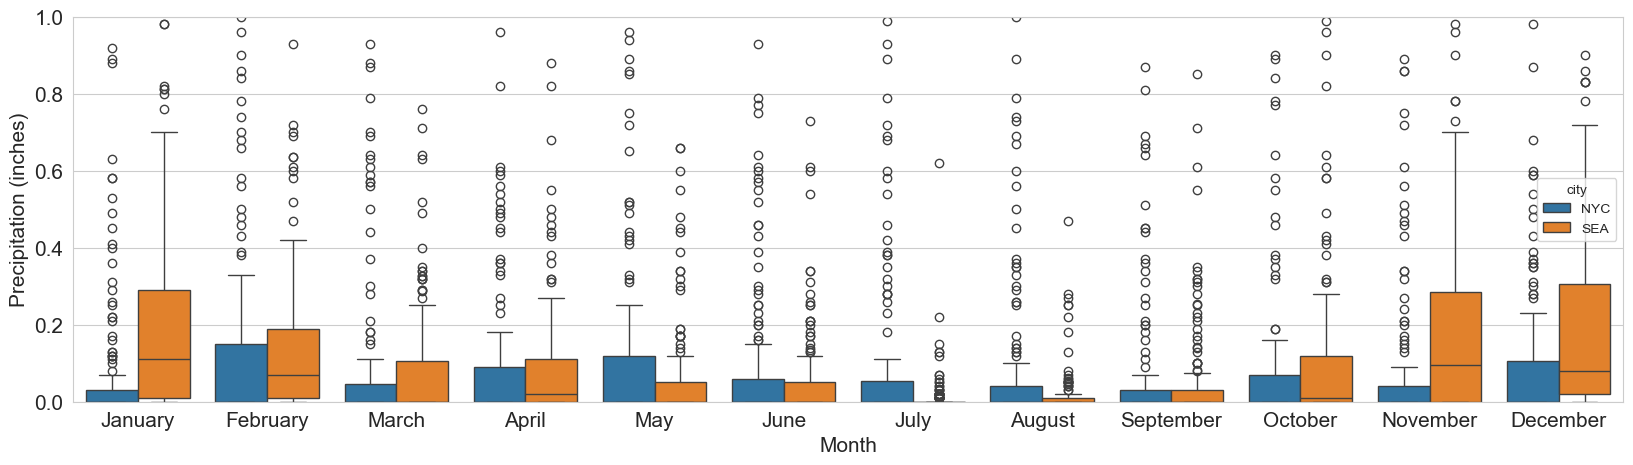

In [115]:
# Plot the distribution of daily precipitation by month for each city using boxplot

plt.figure(figsize=(20, 5))
sns.boxplot(data=df_cleaned, x='month',y='precipitation', hue='city')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15) 
plt.tick_params(labelsize=15)

# Get month names and set x-ticks labels
import calendar
month_names = list(calendar.month_name[1:]) # Get month names for x-axis labels
plt.xticks(ticks=range(12), labels=month_names) # Set x-ticks to month names
plt.ylim(0, 1.0)
plt.show()

# For months October-Febraury Seattle has more rains compared to NYC
# During summers Seattle has less rains compared to NYC.
# I can also see NYC has many outliers compared to Seattle which means there is high fluctuations on some days whearas Seattle has consistent precipiation for most months.


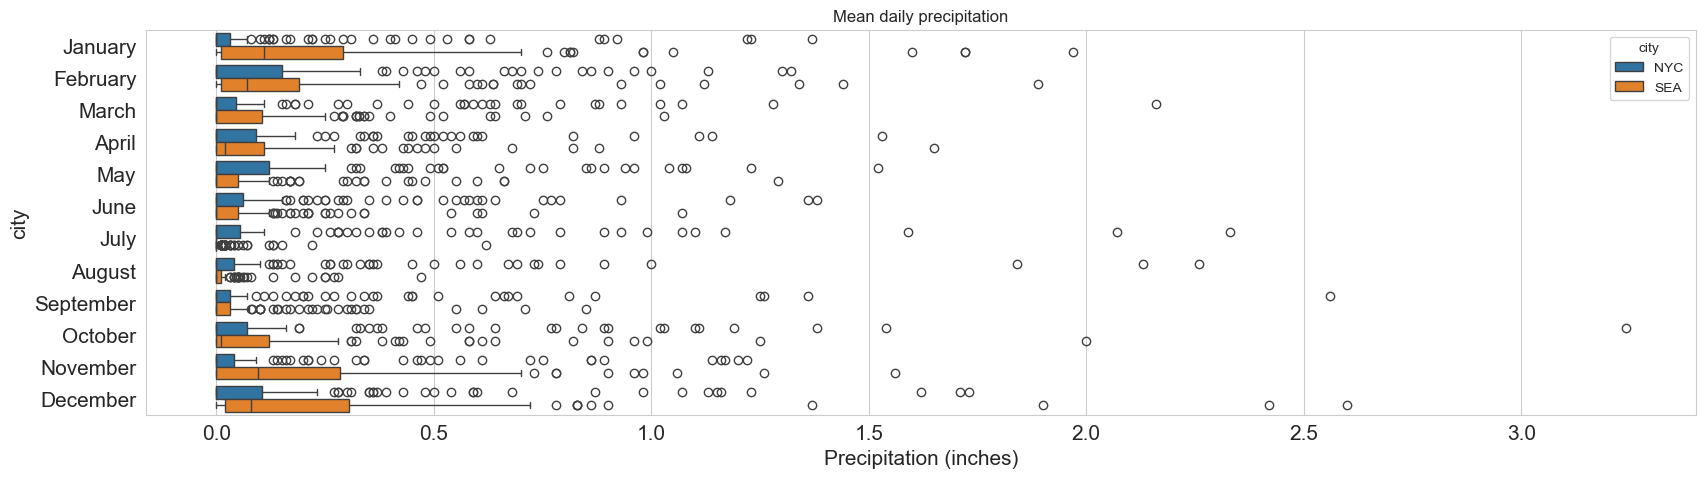

In [149]:
# Modify the box plot to orient horizontally

plt.figure(figsize=(20, 5))
sns.boxplot(data=df_cleaned, y='month', x='precipitation', hue='city', orient='h')
plt.ylabel('city', fontsize=15)
plt.xlabel('Precipitation (inches)', fontsize=15) 
plt.title('Mean daily precipitation')
plt.tick_params(labelsize=15)

import calendar
month_names = list(calendar.month_name[1:]) 
plt.yticks(ticks=range(12),labels=month_names)
plt.show()

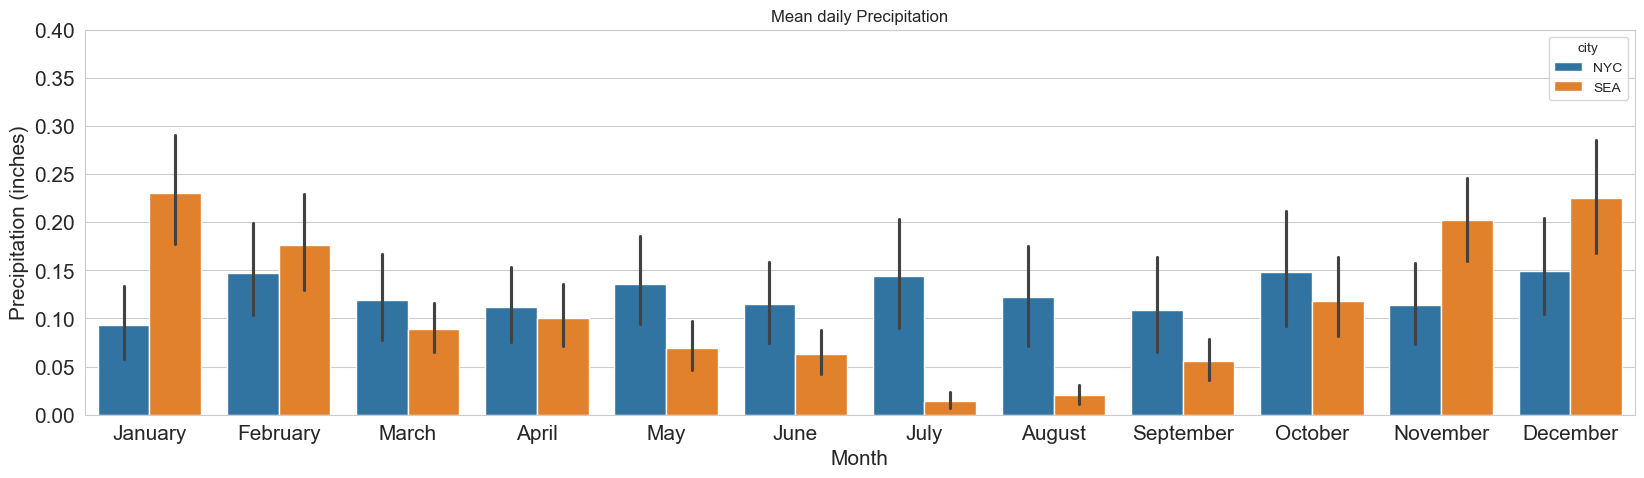

In [150]:
#  Zoom in on the bar plot to show mean daily precipitation by month for each city

plt.figure(figsize=(20, 5))
sns.barplot(data=df_cleaned, x='month', y='precipitation', hue='city')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15) 
plt.title('Mean daily Precipitation')
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)
plt.ylim(0,0.4) # Set y-axis limit to zoom in
plt.show()


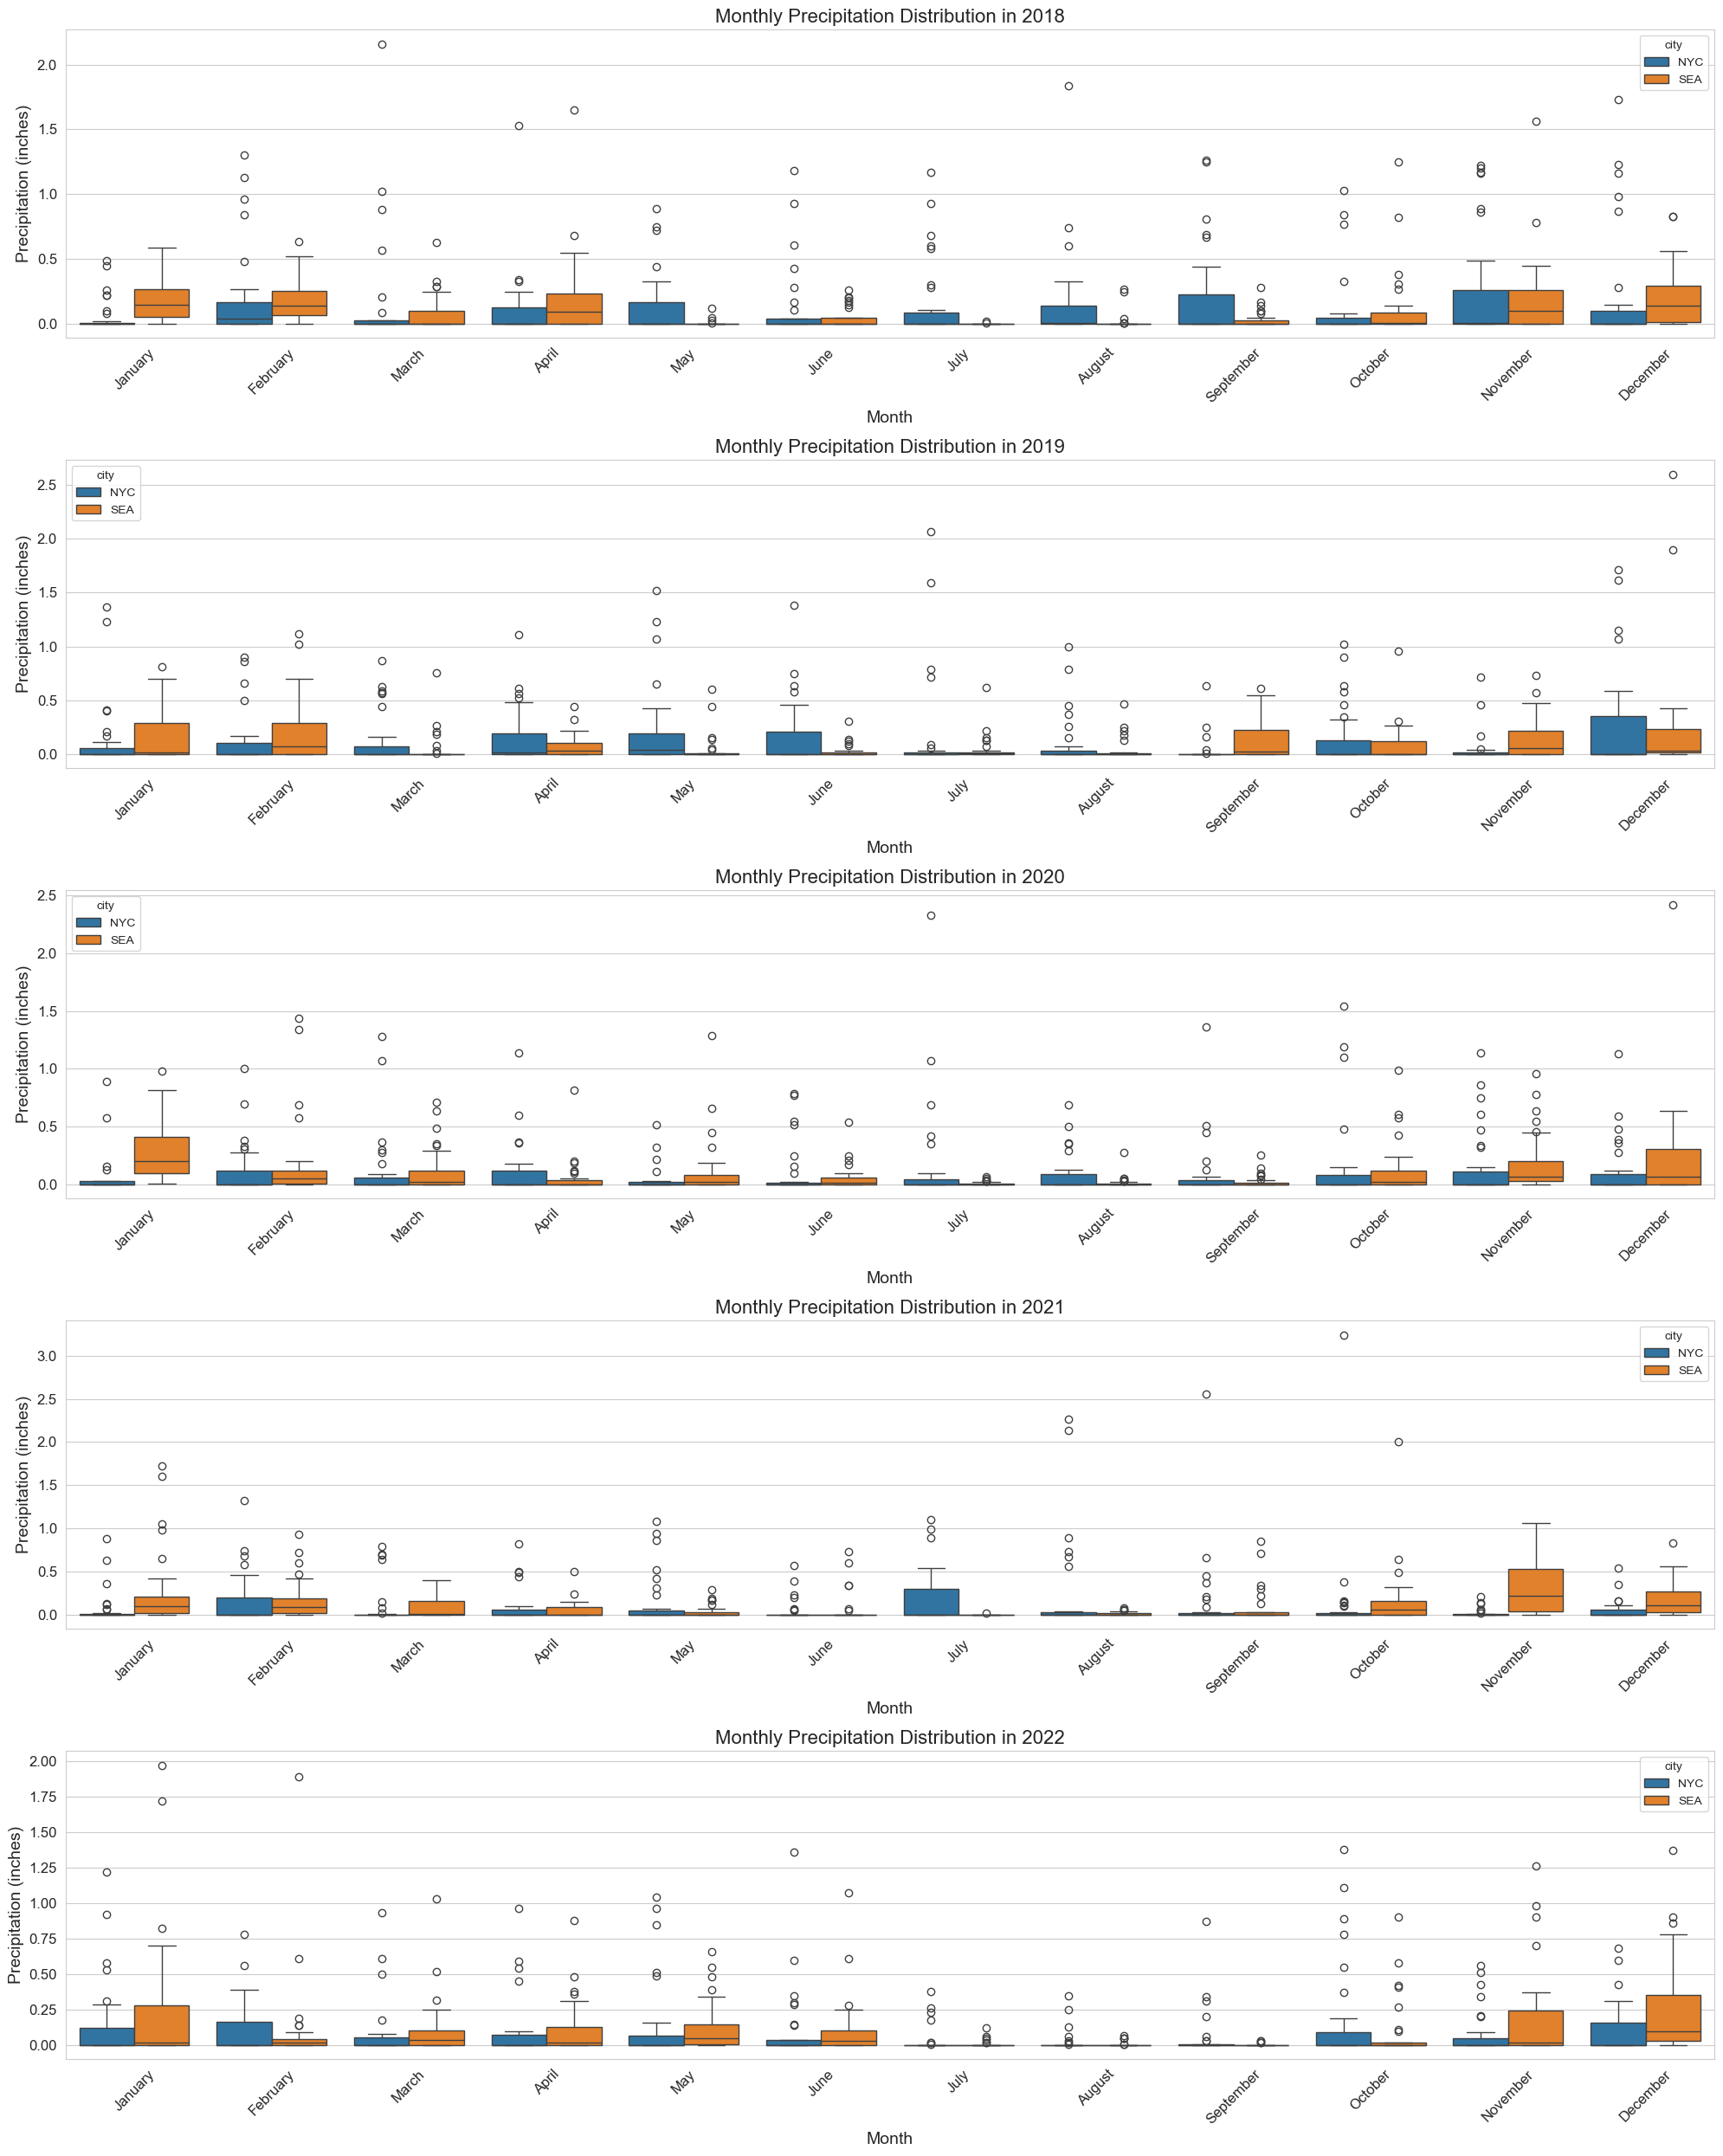

In [151]:
df_cleaned['year'] = df_cleaned['date'].dt.year

# Get unique years
years = sorted(df_cleaned['year'].unique())

# Create subplots - one row per year
fig, axes = plt.subplots(len(years), 1, figsize=(20, 25), sharex=False)

month_names = list(calendar.month_name[1:])  # ['January', ..., 'December']

for i, year in enumerate(years):
    ax = axes[i]
    sns.boxplot(
        data=df_cleaned[df_cleaned['year'] == year],
        x='month', y='precipitation', hue='city',
        ax=ax
    )
    ax.set_title(f"Monthly Precipitation Distribution in {year}", fontsize=16)
    ax.set_xlabel("Month", fontsize=14)
    ax.set_ylabel("Precipitation (inches)", fontsize=14)
    ax.tick_params(labelsize=12)
    ax.set_xticks(range(0,12))
    ax.set_xticklabels(month_names, rotation=45)  # add month names

plt.tight_layout()
plt.show()

## </b>
##-Year 2018: NYC has more outliers than Seattle </b>
##-Year 2019: Both NYC and Seattle have  similar outliers </b>
##-Year 2020: NYC has more outliers than Seattle </b>
##-Year 2021: Both NYC and Seattle have similar outliers </b>
##-Year 2022: Seattle has more outliers than NYC </b>

In [182]:
 # Calculate mean precipitation by city and month
df_cleaned[['month','precipitation','city']].groupby(['city','month']).mean()

precipitation
city month               
NYC  1           0.093097
     2           0.147163
     3           0.119355
     4           0.112333
     5           0.135613
     6           0.114600
     7           0.143871
     8           0.121871
     9           0.109000
     10          0.148065
     11          0.113867
     12          0.149677
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903

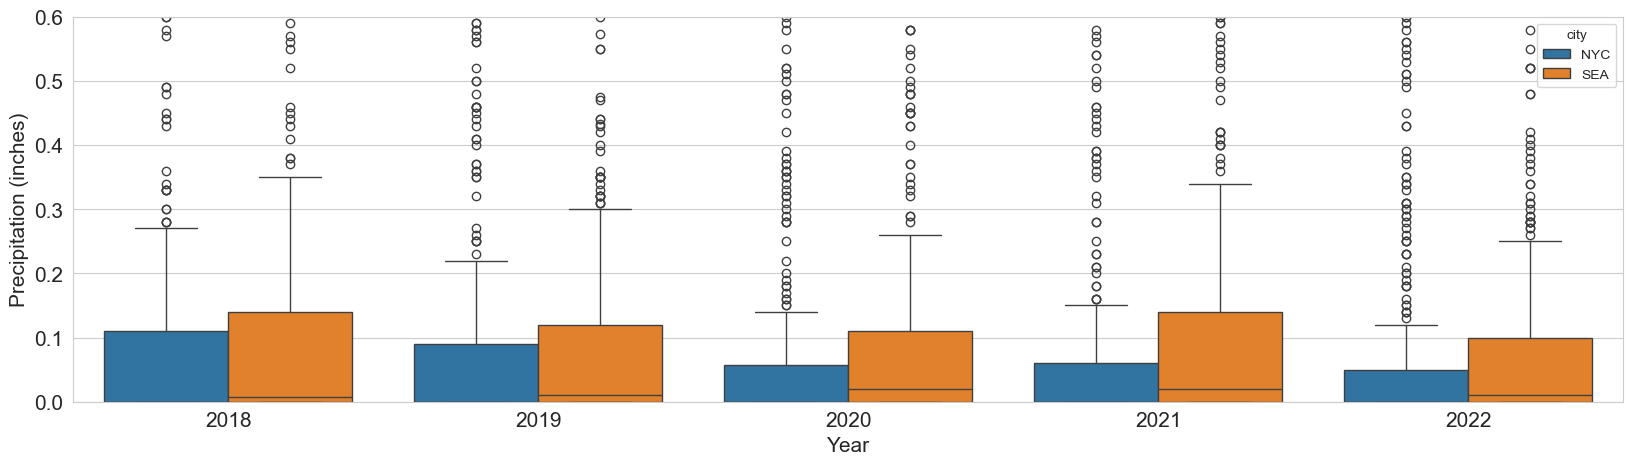

In [183]:
# Plot the distribution of daily precipitation by year for each city using boxplot

plt.figure(figsize=(20, 5))
sns.boxplot(data=df_cleaned, x='year',y='precipitation', hue='city')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15) 
plt.tick_params(labelsize=15)

# Get unique years and set x-ticks labels
years = sorted(df_cleaned['year'].unique())
plt.xticks(ticks=range(len(years)), labels=years) # Set y-ticks to year labels
plt.ylim(0, 0.6)
plt.show()

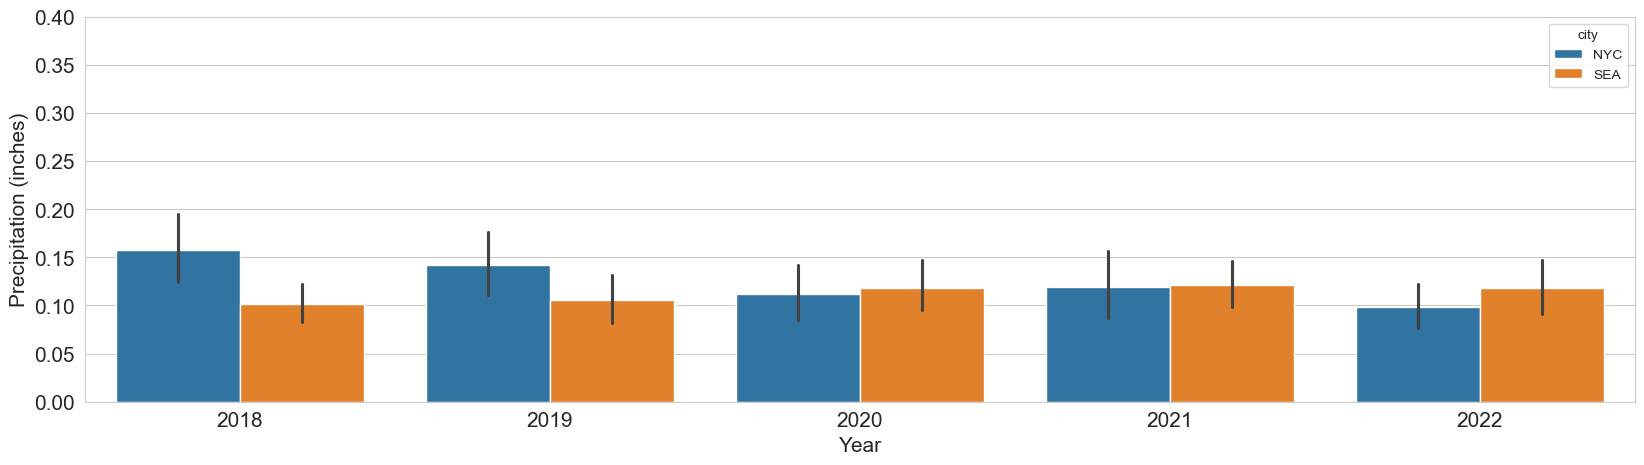

In [178]:
plt.figure(figsize=(20, 5))
sns.barplot(data=df_cleaned, x='year', y='precipitation', hue='city')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15) 
plt.xticks(ticks=range(5), labels=years)
plt.tick_params(labelsize=15)
plt.ylim(0,0.4) # Set y-axis limit to zoom in
plt.show()


In [179]:
# Add a new column indicating if any precipitation occurred
df_cleaned['any_precipitation']=df_cleaned['precipitation']>0
df_cleaned.head()

,date,city,precipitation,day_of_year,month,year,day_of_week,any_precipitation
0,2018-01-01,NYC,0.00,1,1,2018,Monday,False
1,2018-01-02,NYC,0.00,2,1,2018,Tuesday,False
2,2018-01-03,NYC,0.00,3,1,2018,Wednesday,False
3,2018-01-04,NYC,0.49,4,1,2018,Thursday,True
4,2018-01-05,NYC,0.00,5,1,2018,Friday,False


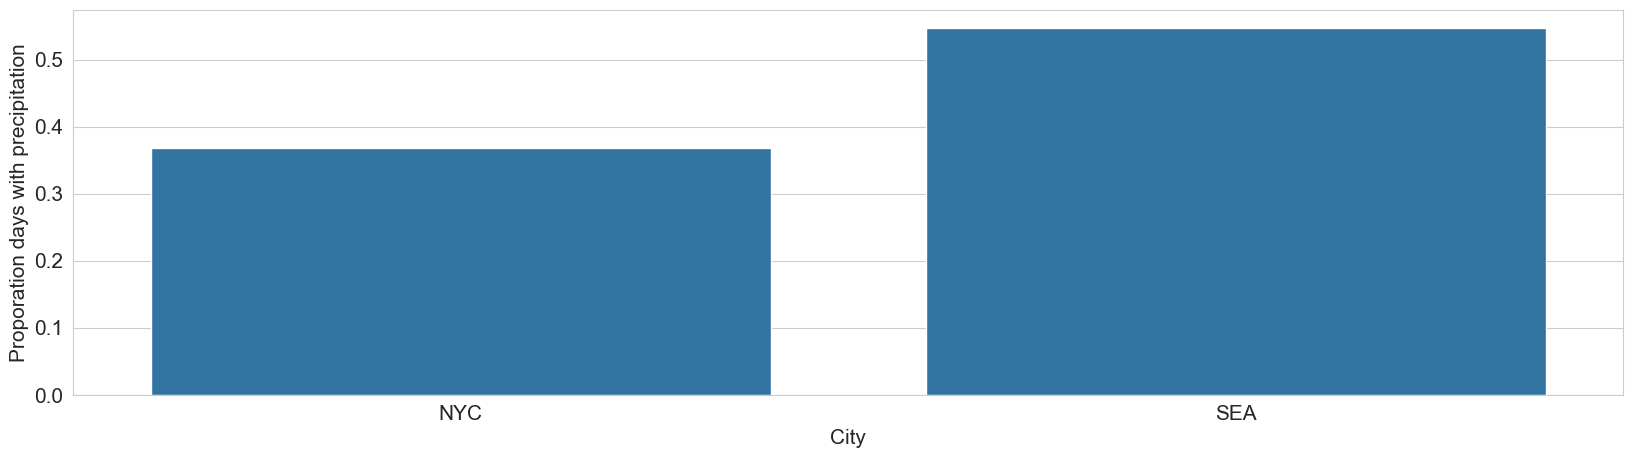

In [180]:
# Plot the proportion of days with any precipitation

plt.figure(figsize=(20, 5))
sns.barplot(data=df_cleaned, x='city', y='any_precipitation', errorbar=None)
plt.xlabel('City', fontsize=15)
plt.ylabel('Proporation days with precipitation', fontsize=15) 
plt.tick_params(labelsize=15)
plt.show()

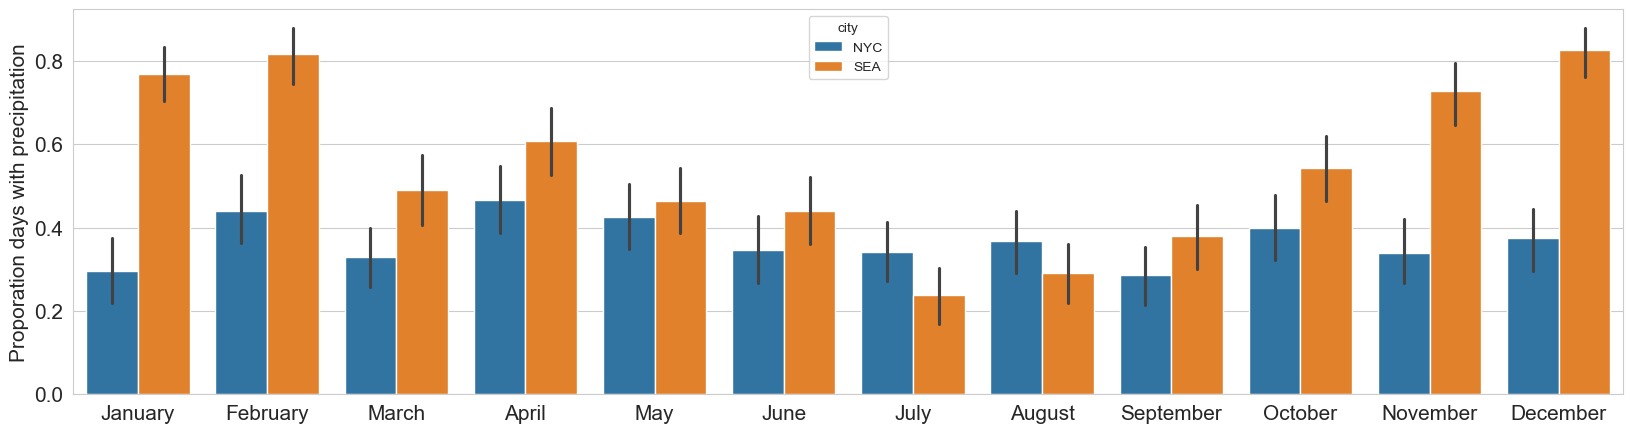

In [181]:
# Plot the proportion of days with any precipitation by month for each city
plt.figure(figsize=(20, 5))
sns.barplot(data=df_cleaned,x='month', y='any_precipitation', hue='city')
plt.xlabel(None)
plt.ylabel('Proporation days with precipitation', fontsize=15) 
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)
plt.show()

## Modeling   

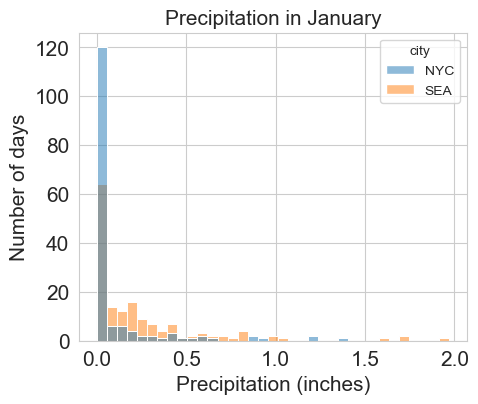

In [158]:
# Plot the histogram of daily precipitation for January in both cities

plt.figure(figsize=(5, 4))
sns.histplot(data=df_cleaned[df_cleaned['month']==1], x='precipitation', hue='city')
plt.xlabel('Precipitation (inches)', fontsize=15)
plt.ylabel('Number of days', fontsize=15) 
plt.title('Precipitation in January', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

In [ ]:
from scipy import stats
# Perform a t-test to compare mean precipitation between Seattle and NYC
significance_level = 0.05
significantly_different = np.zeros(12)

#Perform t-test for each month
for month in range(1, 13):
    #get precipitation data for both cities for the current month
    seattle_data = df_cleaned[
        (df_cleaned['city']=='SEA') & (df_cleaned['month']==month)
    ]['precipitation']

    nyc_data=df_cleaned[
        (df_cleaned['city']=='NYC') & (df_cleaned['month']==month)
    ]['precipitation']
    # Perform Welch's t-test
    t_stat, p_value = stats.ttest_ind(
        seattle_data, nyc_data, equal_var = False
        )
    

    if p_value < significance_level:
        significantly_different[month-1] = 1

    print(f'Month: {month}:')
    print(f't-statistic: {t_stat:.2f}')
    print(f'p-value t test= {p_value:.3f}')
    print('_'*20)
    

Month: 1:
t-statistic: 4.11
p-value t test= 0.000
____________________
Month: 2:
t-statistic: 0.85
p-value t test= 0.397
____________________
Month: 3:
t-statistic: -1.10
p-value t test= 0.272
____________________
Month: 4:
t-statistic: -0.46
p-value t test= 0.645
____________________
Month: 5:
t-statistic: -2.51
p-value t test= 0.013
____________________
Month: 6:
t-statistic: -2.13
p-value t test= 0.034
____________________
Month: 7:
t-statistic: -4.42
p-value t test= 0.000
____________________
Month: 8:
t-statistic: -3.71
p-value t test= 0.000
____________________
Month: 9:
t-statistic: -1.92
p-value t test= 0.057
____________________
Month: 10:
t-statistic: -0.79
p-value t test= 0.431
____________________
Month: 11:
t-statistic: 2.79
p-value t test= 0.006
____________________
Month: 12:
t-statistic: 1.85
p-value t test= 0.065
____________________


## null hypothesis is mean of precipitation in Seattle city = mean of precipitation in NYC
## alternative hypothesis is mean of precipitaion in Seattle city != mean of precipitation in NYC
## Null Hypothesis for Seattle_January=Null Hypothesis for NYC_January
## Alternative Hypothesis for Seattle_january != Alternative Hypothesis for NYC_january
## Perform Welch's t-test for each month from January to December.
## if p-value is than the significance level then reject the null hypothesis
## So if p-value is less than 0.05 we can say that precipitation in January month(and so on) between 2 cities are significantly different

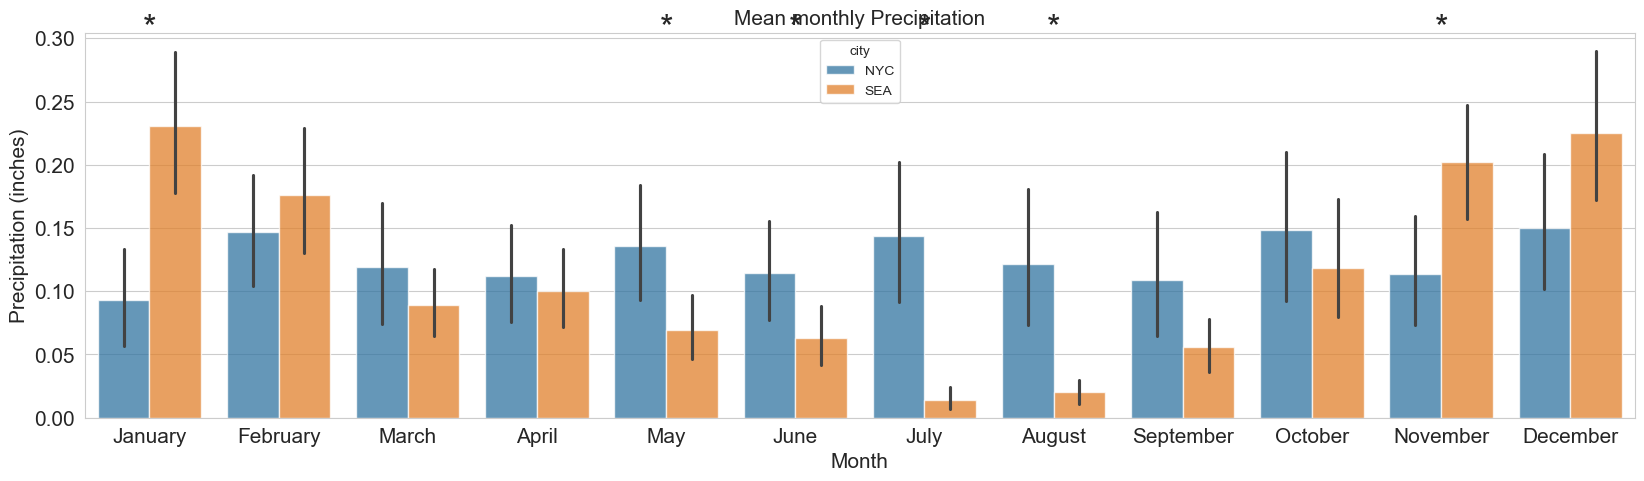

In [160]:
plt.figure(figsize=(20, 5))
sns.barplot(data=df_cleaned, x='month', y='precipitation', hue='city', alpha=0.75)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15) 
plt.title('Mean monthly Precipitation', fontsize=15)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)

# Add starts for significantly different months
for month in range(12):   
    if significantly_different[month]==1:
        plt.text(month,0.3, '*', ha='center', fontsize=25)  
plt.show()

In [161]:
from statsmodels.stats.proportion import proportions_ztest

significance_level = 0.05     
significantly_different_proportion = np.zeros(12)

#Perform z-test for proportions for each month
for month in range(1,13):

    #create a contingency table for each cities the current month
    contingency_table=pd.crosstab(
        df_cleaned[df_cleaned['month']==month]['city'],
        df_cleaned[df_cleaned['month']==month]['any_precipitation']
        )

    #calculate the number of True values(days with precipitation) for each city
    days_with_precipitation=contingency_table[True]
   
    #calculate the total number of days for each city]
    total_counts = contingency_table.sum(axis=1)

    #hypothesis test for proportions
    zstat,p_value = proportions_ztest(
        count=days_with_precipitation,
        nobs=total_counts,alternative='two-sided'
        )

    if p_value<significance_level:
        significantly_different_proportion[month-1] = 1

    print(f'Month: {month}:')
    print(f'z-statistic: {zstat:.2f}')
    print(f'p-value z test= {p_value:.3f}')
    print('_'*20)


Month: 1:
z-statistic: -8.31
p-value z test= 0.000
____________________
Month: 2:
z-statistic: -6.53
p-value z test= 0.000
____________________
Month: 3:
z-statistic: -2.89
p-value z test= 0.004
____________________
Month: 4:
z-statistic: -2.43
p-value z test= 0.015
____________________
Month: 5:
z-statistic: -0.69
p-value z test= 0.493
____________________
Month: 6:
z-statistic: -1.65
p-value z test= 0.098
____________________
Month: 7:
z-statistic: 2.00
p-value z test= 0.045
____________________
Month: 8:
z-statistic: 1.45
p-value z test= 0.147
____________________
Month: 9:
z-statistic: -1.71
p-value z test= 0.086
____________________
Month: 10:
z-statistic: -2.50
p-value z test= 0.012
____________________
Month: 11:
z-statistic: -6.71
p-value z test= 0.000
____________________
Month: 12:
z-statistic: -8.12
p-value z test= 0.000
____________________


### Z-Test for Proportions Explanation
This analysis performs a z-test for proportions for each month to compare the proportion of days with precipitation between Seattle and NYC

**Steps:**
- For each month, a contingency table is created showing the count of days with and without precipitation for each city.
- The number of days with precipitation and the total number of days for each city are calculated.
- The `proportions_ztest` function tests if the proportion of days with precipitation is significantly different between the cities for that month.
- If the p-value is less than the significance level (e.g., 0.05), that month is marked as having a significantly different proportion.
- The results (month, z-statistic, p-value) are printed for interpretation.

This helps identify months where the likelihood of precipitation differs significantly between the two cities.

In [162]:
# Create a contingency table for January (month=1) as an example

contingency_table=pd.crosstab(
    df_cleaned[df_cleaned['month']==1]['city'],
    df_cleaned[df_cleaned['month']==1]['any_precipitation']
    )
contingency_table

any_precipitation,False,True
city,,
NYC,109,46
SEA,36,119


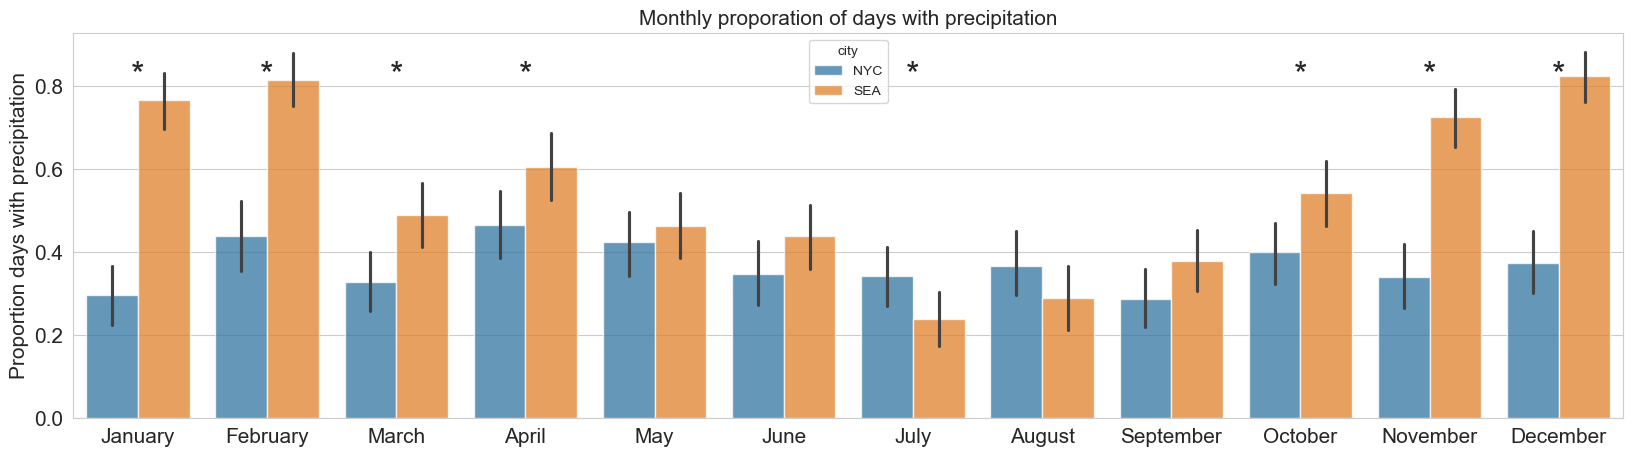

In [163]:
# Plot the proportion of days with any precipitation by month for each city,highlighting significant differences
plt.figure(figsize=(20, 5))
sns.barplot(data=df_cleaned, x='month', y='any_precipitation', hue='city', alpha=0.75)
plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize=15) 
plt.title('Monthly proporation of days with precipitation', fontsize=15)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)

# Add starts for significantly different months
for month in range(12):   
    if significantly_different_proportion[month] == 1:
        plt.text(month, 0.80, '*', ha='center', fontsize=25)  
plt.show()